<a href="https://colab.research.google.com/github/mimrancomsats/ProgrammingforAI_FALL24/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
*   Importing Libraries
*   Data Understanding
*   Data Preparation
*   Data Imputation

## Import Libraries
Let's import some libraries to get started!

In [318]:
import pandas as pd
import seaborn as sns

In [319]:
#titanic = sns.load_dataset('titanic')
#titanic.to_csv('titanic.csv')

## Data Understanding

*   Dataframe shape
*   Head and Tail
*   Data Types
*   Describe

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [320]:
train = pd.read_csv('titanic.csv')

In [321]:
train.shape

(891, 12)

In [322]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [323]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [324]:
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [325]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [326]:
train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [327]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

##Feature Understanding

*   Plotting Feature Distributions

  *   Barchart (Categorical Data)
  *   Histogram (Numerical Data)
  *   Boxplot (Numerical Data)

Let's check the frequency of survived and not survived people in the dataset.

<ipython-input-328-8a11688b9f87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='rainbow')


<Axes: xlabel='Survived', ylabel='count'>

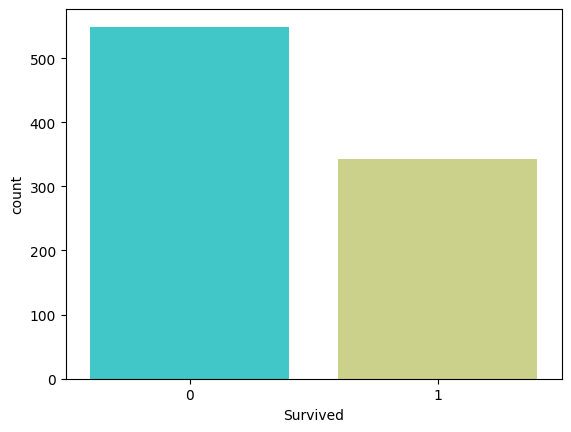

In [328]:
sns.countplot(x='Survived',data=train,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

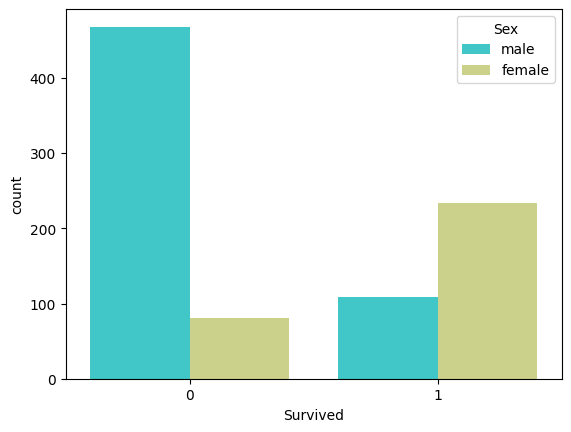

In [329]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

<ipython-input-365-8a11688b9f87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='rainbow')


<Axes: xlabel='Survived', ylabel='count'>

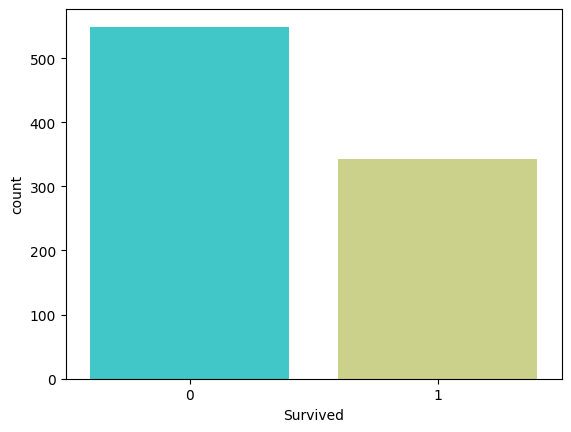

In [365]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<ipython-input-331-f4a26f01f769>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

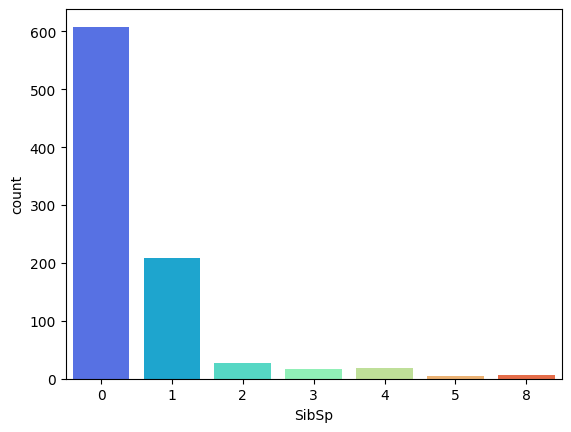

In [331]:
sns.countplot(x='SibSp',data=train,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

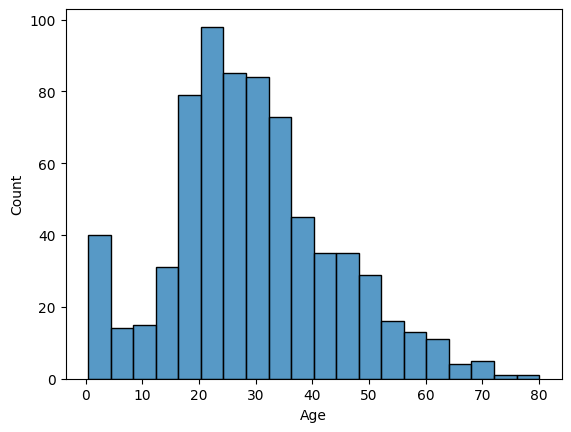

In [332]:
sns.histplot(train['Age'])

<Axes: >

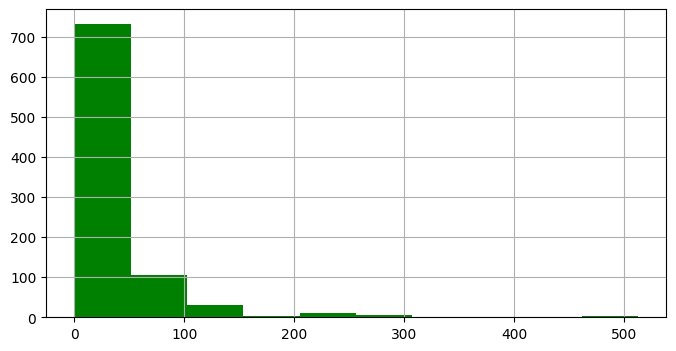

In [333]:
train['Fare'].hist(color='green', figsize=(8,4))

<Axes: xlabel='Age', ylabel='Count'>

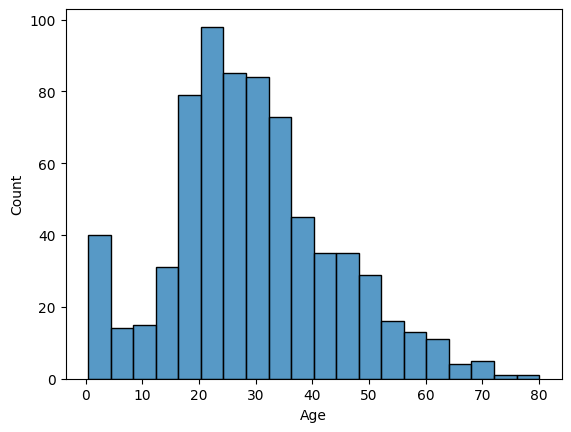

In [334]:
sns.histplot(train['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

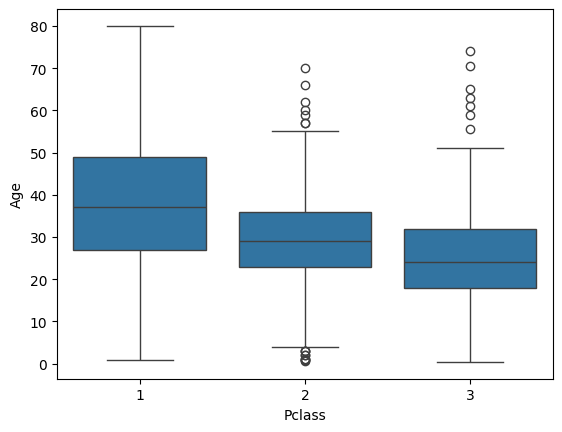

In [335]:
sns.boxplot(y='Age', x='Pclass', data=train)

<Axes: ylabel='Age'>

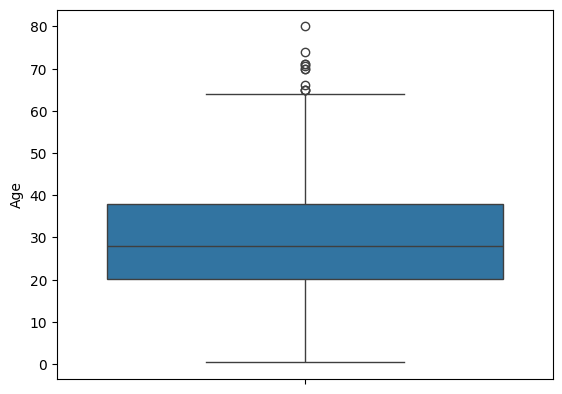

In [336]:
sns.boxplot(y='Age', data=train)

# **Outlier Removal**

In [337]:
#train=train[train['Age'] < 66]

In [338]:
#sns.boxplot(y='Age', data=train)

##Data Preparation

*   Dropping irrelevant columns and rows
*   Handling Missing Values
*   Identifying duplicated columns
*   Renaming Columns


Let's begin some exploratory data analysis! We'll start by dropping irrelevant columns

In [339]:
train.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [340]:
train.shape

(891, 9)

In [341]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin'],
      dtype='object')

In [342]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN


## Data Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [343]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687


In [344]:
train.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,True
889,False,False,False,False,False,False,False,False,False


<Axes: >

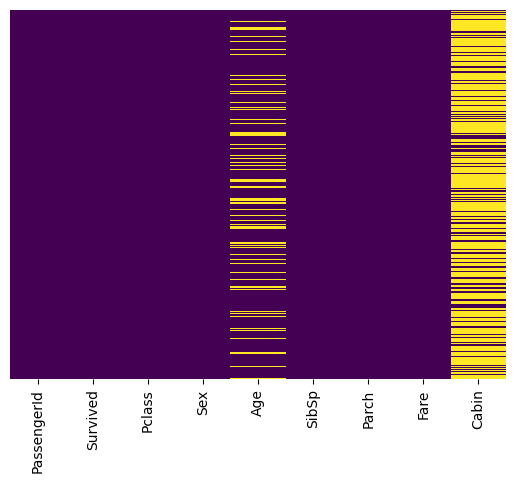

In [345]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [346]:
train.drop('Cabin',axis=1,inplace=True)

In [347]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [348]:
#sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
mean_values = train.groupby('Pclass')['Age'].mean()
print(mean_values)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [349]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [350]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-349-b8fc05cf2ef4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-349-b8fc05cf2ef4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Now let's check that heat map again!

<Axes: >

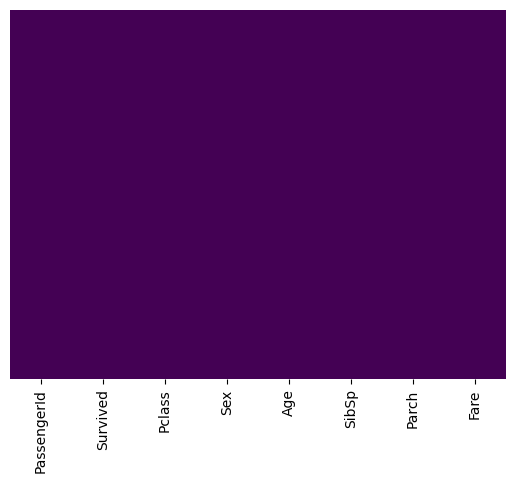

In [351]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Identifying Duplicated Columns**

In [352]:
train.loc[train.duplicated()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


In [353]:
train.loc[train.duplicated(subset=['Pclass'])]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,24.0,0,0,8.4583
6,7,0,1,male,54.0,0,0,51.8625
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,24.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [354]:
# Checking an example duplicate
train.query('Age == 1')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
164,165,0,3,male,1.0,4,1,39.6875
172,173,1,3,female,1.0,1,1,11.1333
183,184,1,2,male,1.0,2,1,39.0000
381,382,1,3,female,1.0,0,2,15.7417
386,387,0,3,male,1.0,5,2,46.9000
788,789,1,3,male,1.0,1,2,20.5750
827,828,1,2,male,1.0,0,2,37.0042


##Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [355]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [356]:
sex = pd.get_dummies(train['Sex'],dtype=int)

In [357]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [358]:
train = pd.concat([train,sex],axis=1)

In [359]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,female,male
0,1,0,3,male,22.0,1,0,7.2500,0,1
1,2,1,1,female,38.0,1,0,71.2833,1,0
2,3,1,3,female,26.0,0,0,7.9250,1,0
3,4,1,1,female,35.0,1,0,53.1000,1,0
4,5,0,3,male,35.0,0,0,8.0500,0,1


In [360]:
train.drop(['Sex'],axis=1,inplace=True)

In [361]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1


In [362]:
train = train.rename(columns={'male':'Male'})

In [363]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,Male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1


In [364]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   female       891 non-null    int64  
 8   Male         891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


# Lab Task

Perform the steps mentioned above on the following datasete

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease